<a href="https://colab.research.google.com/github/matthias-k/computational_physics_2024/blob/master/01_linear_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Train a MLP (Multi Layer Perceptron) to classify images from the MNIST database

# Process is broken down to three steps
# 1: Load and visualize the data
# 2: Define a neural network
# 3: Train the model
# 4: Evaluate the performance of the model

In [2]:
# Import libraries necessary libraries 
import torch
import numpy as np

In [3]:
##########################################
##### 1: LOAD AND VISUALIZE THE DATA #####
##########################################

from torchvision import datasets
import torchvision.transforms as transforms

# Number of subprocesses to use for data loading
num_workers = 0
# How many samples per batch to load
batch_size = 20

# Convert data to torch.FloatTensor
transform = transforms.ToTensor()

# Choose the training and test datasets
train_data = datasets.MNIST(root='data', train=True,
                                   download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False,
                                  download=True, transform=transform)

# Prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
    num_workers=num_workers)

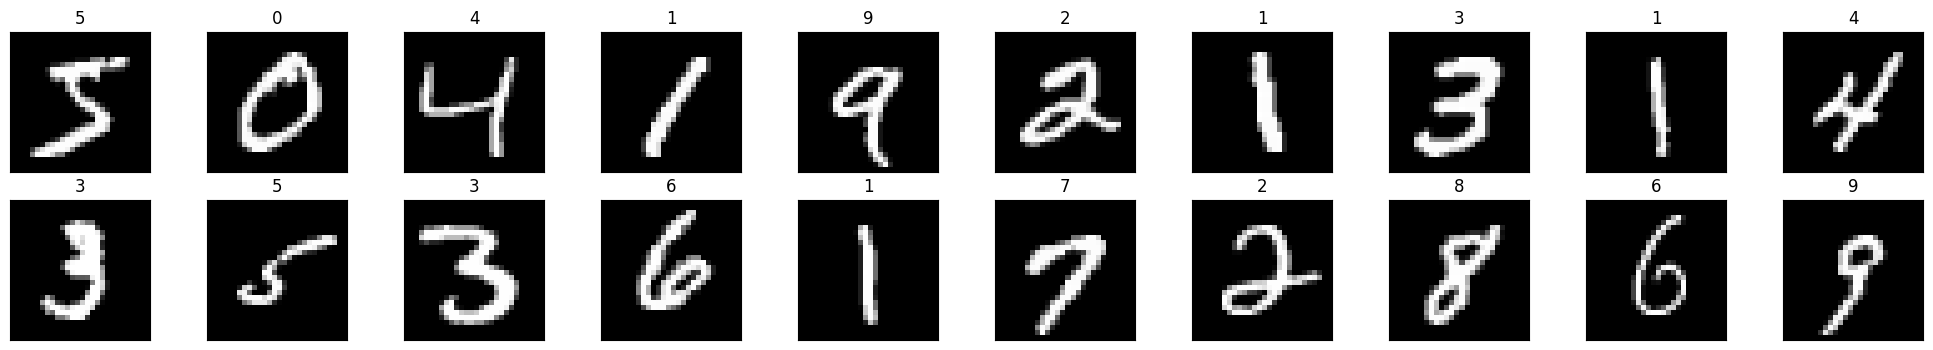

In [4]:
# Visualize a batch of training data
import matplotlib.pyplot as plt
%matplotlib inline
    
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = next(dataiter)
images = images.numpy()

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):                                                               # Adjust this line if batch size is changed!
    ax = fig.add_subplot(2, 20 // 2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    # print out the correct label for each image
    # .item() gets the value contained in a Tensor
    ax.set_title(str(labels[idx].item()))

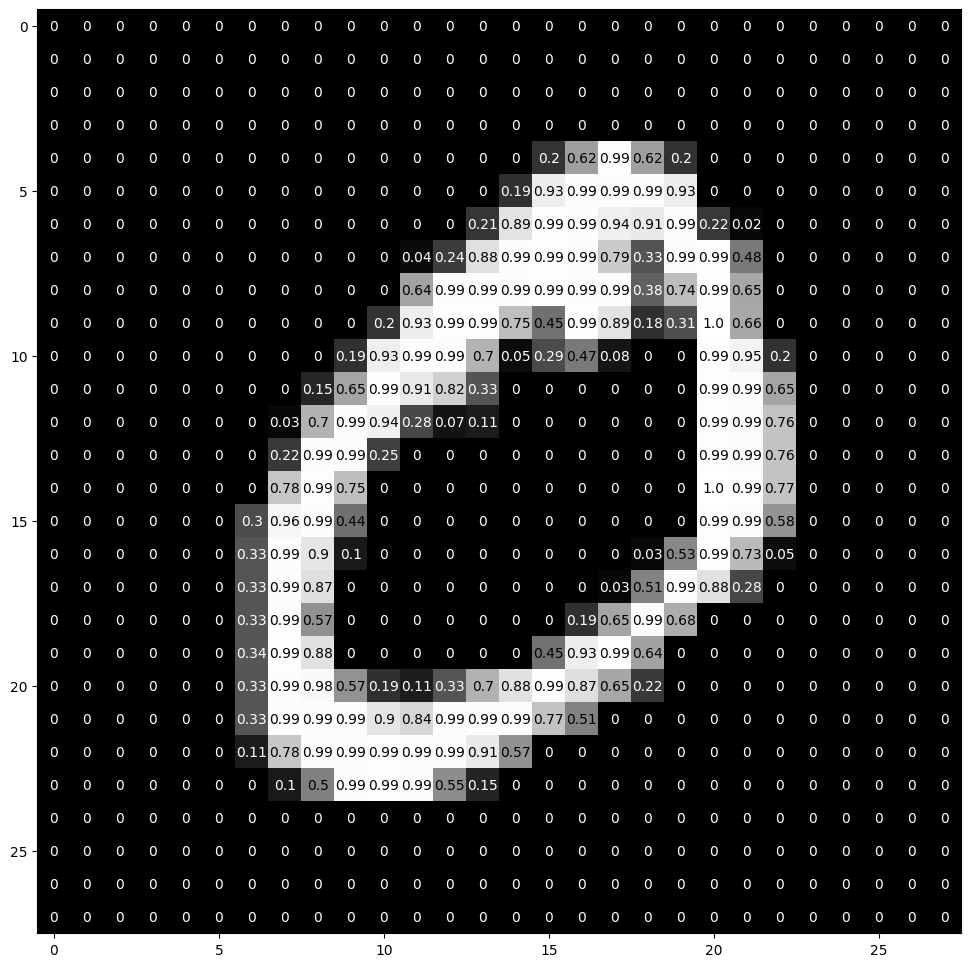

In [5]:
# View an image in more detail
img = np.squeeze(images[1])

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')

In [6]:
##############################################
##### 2: DEFINE THE NETWORK ARCHITECTURE #####
##############################################

# ---> Use "strg + k + c" to comment code and "strg + k + u" to uncomment
# ---> Change between tasks

### 2.1 ###

# import torch.nn as nn
# import torch.nn.functional as F

# ## TODO: Define the NN architecture
# class Net(nn.Module):
#     def __init__(self):
#         super(Net, self).__init__()
#         # linear layer (784 -> 1 hidden node)
#         self.fc1 = nn.Linear(28 * 28, 10) # ---> 10 exits instead of 1 (one per class)

#     def forward(self, x):
#         # flatten image input
#         x = x.view(-1, 28 * 28)
#         # add hidden layer, with relu activation function
#         x = F.relu(self.fc1(x))
#         return x

# # initialize the NN
# model = Net()
# print(model)

### 2.2 ###

# import torch.nn as nn
# import torch.nn.functional as F

# class OptimizedMLP(nn.Module):
#     # ---> Optimized multi-layer perceptron
#     # ---> Use multiple layers and non-linear activation
#     # ---> "Dropout" (-> sets random neurons to 0) avoids adjustment to training data ("overfitting")

#     # ---> From GitHub discussion:
#     # ---> For MNIST 2-4 layers are sufficient in most cases
#     # ---> More layers could lead to overfitting

#     # ---> Reduce number of neurons per layer 
#     # ---> Why?
#     # --->
#     # ---> This also reduces the number of parameters and makes the network more efficient and less memory dependet
#     # ---> Too many neurons in later layers may force the model to save unnnecessary details and and prevent decision making

#     # ---> Is there a rule for the decrease in number of neurons per layer?
#     # ---> Not really, at least i couldn't find one. But in many examples on GitHub they use  "512, 256, 128, 64, ..." (WHY?)
#     # ---> Make sure to end the last layer at 10 (corresponding to the number of output classes)

#     # ---> Didn't find a rule for when to set the dropout
#     # ---> Not too soon (model might lose important features)
#     # ---> Not too late (model is almost fully trained, so the dropout can't really do anything against overfitting anymore)

#     def __init__(self):
#         super(OptimizedMLP, self).__init__()
#         # First layer (28 * 28 = 784 -> 256)
#         self.fc1 = nn.Linear(28 * 28, 256)
#         # Normalization
#         self.bn1 = nn.BatchNorm1d(256)
#         # Second layer (256 -> 128)
#         self.fc2 = nn.Linear(256, 128)
#         self.bn2 = nn.BatchNorm1d(128)
#         # Third layer (128 -> 64)
#         self.fc3 = nn.Linear(128, 64)
#         # Dropout to avoid overfitting
#         self.dropout = nn.Dropout(0.3)
#         # Last layer (64 -> 10)
#         self.fc4 = nn.Linear(64, 10)

#     def forward(self, x):
#         x = x.view(-1, 28 * 28)
#         x = F.relu(self.bn1(self.fc1(x)))
#         x = F.relu(self.bn2(self.fc2(x)))
#         x = F.relu(self.fc3(x))
#         x = self.dropout(x)
#         x = self.fc4(x)
#         return x

# model = OptimizedMLP()
# print(model)

### 2.3 ###

import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        
        # ---> Convolutional layers with normalization
        self.conv1 = nn.Conv2d(1, 8, kernel_size=3)
        self.bn1 = nn.BatchNorm2d(8)
        self.conv2 = nn.Conv2d(8, 10, kernel_size=3)
        self.bn2 = nn.BatchNorm2d(10)
        self.conv3 = nn.Conv2d(10, 10, kernel_size=3)
        self.bn3 = nn.BatchNorm2d(10)
        
        # ---> Pooling layer
        # ---> Reduce size of feature maps
        # ---> Only keep important values and reduce overfitting
        self.pool = nn.MaxPool2d(2, 2)
        
        # ---> Dropout-layer (convolutional layers)
        # ---> Delete randomly 25% of neurons in convolutional layers
        self.dropout_conv = nn.Dropout2d(0.25)
        # ---> Dropout-layer (fully connected layers)
        # ---> Delete randomly 50% of neurons in fully connected layers
        self.dropout_fc = nn.Dropout(0.5)
        
        # ---> Fully connected layers
        # ---> Extract relevant features and make final decision
        self.fc1 = nn.Linear(10 * 11 * 11, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.bn2(self.conv2(x)))
        x = self.pool(F.relu(self.bn3(self.conv3(x))))
        x = self.dropout_conv(x)
        
        # ---> Use x.size(0) instead of batch_size
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.dropout_fc(x)
        x = self.fc2(x)
        return x

model = CNN()
print(model)


CNN(
  (conv1): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1))
  (bn1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(8, 10, kernel_size=(3, 3), stride=(1, 1))
  (bn2): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
  (bn3): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout_conv): Dropout2d(p=0.25, inplace=False)
  (dropout_fc): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=1210, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


In [7]:
#####################################################
##### 3: SPECIFY LOSS AND OPTIMIZATION FEATURES #####
#####################################################

## TODO: Specify loss and optimization functions

# ---> Functions from PyTorch documentation

# Specify loss function
# ---> Cross entropy loss function
criterion = nn.CrossEntropyLoss()

# Specify optimizer
# ---> Statistical gradient descent
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [8]:
##############################
##### 4: TRAIN THE MODEL #####
##############################

# Number of epochs to train the model
n_epochs = 30  # Suggest training between 20-50 epochs

model.train() # Prep model for training

for epoch in range(n_epochs):
    # Monitor training loss
    train_loss = 0.0
    
    ###################
    # Train the model #
    ###################
    for data, target in train_loader:
        # Clear the gradients of all optimized variables
        optimizer.zero_grad()
        # Forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # Calculate the loss
        loss = criterion(output, target)
        # Backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # Perform a single optimization step (parameter update)
        optimizer.step()
        # Update running training loss
        train_loss += loss.item()*data.size(0)
        
    # Print training statistics 
    # Calculate average loss over an epoch
    train_loss = train_loss/len(train_loader.sampler)

    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch+1, 
        train_loss
        ))

Epoch: 1 	Training Loss: 0.314532
Epoch: 2 	Training Loss: 0.147320
Epoch: 3 	Training Loss: 0.115051
Epoch: 4 	Training Loss: 0.100768
Epoch: 5 	Training Loss: 0.087939
Epoch: 6 	Training Loss: 0.083942
Epoch: 7 	Training Loss: 0.076758
Epoch: 8 	Training Loss: 0.072303
Epoch: 9 	Training Loss: 0.069368
Epoch: 10 	Training Loss: 0.066188
Epoch: 11 	Training Loss: 0.062033
Epoch: 12 	Training Loss: 0.061110
Epoch: 13 	Training Loss: 0.057230
Epoch: 14 	Training Loss: 0.055525
Epoch: 15 	Training Loss: 0.054376
Epoch: 16 	Training Loss: 0.053107
Epoch: 17 	Training Loss: 0.050519
Epoch: 18 	Training Loss: 0.047383
Epoch: 19 	Training Loss: 0.048750
Epoch: 20 	Training Loss: 0.048981
Epoch: 21 	Training Loss: 0.047342
Epoch: 22 	Training Loss: 0.044964
Epoch: 23 	Training Loss: 0.046415
Epoch: 24 	Training Loss: 0.042637
Epoch: 25 	Training Loss: 0.043797
Epoch: 26 	Training Loss: 0.040975
Epoch: 27 	Training Loss: 0.040999
Epoch: 28 	Training Loss: 0.041515
Epoch: 29 	Training Loss: 0.0

In [9]:
####################################################
##### 5: EVALUATE THE PERFORMANCE OF THE MODEL #####
####################################################

# Initialize lists to monitor test loss and accuracy
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval() # Prep model for *evaluation*

for data, target in test_loader:
    # Forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # Calculate the loss
    loss = criterion(output, target)
    # Update test loss 
    test_loss += loss.item()*data.size(0)
    # Convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # Compare predictions to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    # Calculate test accuracy for each object class
    for i in range(len(target)):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# Calculate and print avg test loss
test_loss = test_loss/len(test_loader.sampler)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.030787

Test Accuracy of     0: 99% (976/980)
Test Accuracy of     1: 99% (1129/1135)
Test Accuracy of     2: 99% (1023/1032)
Test Accuracy of     3: 98% (998/1010)
Test Accuracy of     4: 98% (970/982)
Test Accuracy of     5: 99% (886/892)
Test Accuracy of     6: 98% (946/958)
Test Accuracy of     7: 99% (1019/1028)
Test Accuracy of     8: 99% (966/974)
Test Accuracy of     9: 98% (995/1009)

Test Accuracy (Overall): 99% (9908/10000)


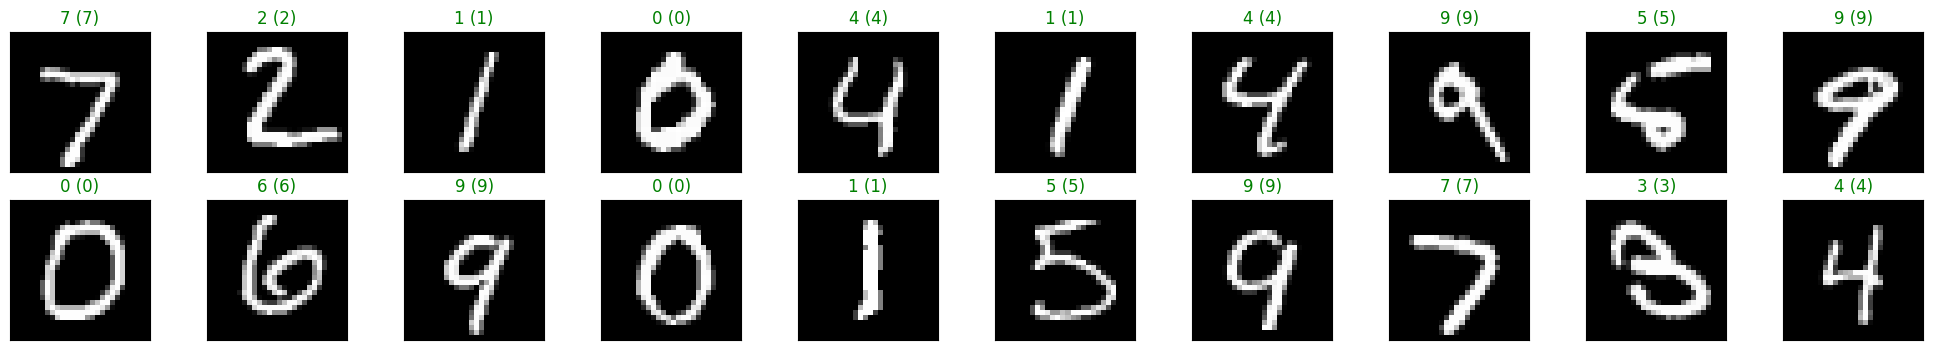

In [10]:
# Obtain one batch of test images
dataiter = iter(test_loader)
images, labels = next(dataiter)

# Get sample outputs
output = model(images)
# Convert output probabilities to predicted class
_, preds = torch.max(output, 1)
# Prep images for display
images = images.numpy()

# Plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):                                                               # Adjust this line if batch size is changed!
    ax = fig.add_subplot(2, 20 //2, idx+1, xticks=[], yticks=[]) # ---> Integer division because otherwise a floating point number is set for the number of columns -> error!
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color=("green" if preds[idx]==labels[idx] else "red"))

In [ ]:
###################
##### RESULTS #####
###################

################
### TASK 2.1 ###
################

# ---> The training loss varies in different successive runs even though i always cleared the outputs and restarted the kernel. However, the accuracy is stable around 92%.

################
### TASK 2.2 ###
################

## LEARNING RATE ##

# ---> Test run 1: Learning rate = 0.1,   Batch size = 20 -> 92% accuracy (initial values)

# ---> Test run 2: Learning rate = 0.05,  Batch size = 20 -> 92% accuracy
# ---> Test run 3: Learning rate = 0.01,  Batch size = 20 -> 92% accuracy
# ---> Test run 4: Learning rate = 0.001, Batch size = 20 -> 90% accuracy -> training loss in early epochs greatly increased (!)

# ---> Test run 5: Learning rate = 0.5,   Batch size = 20 -> 74% accuracy -> training loss in early epochs greatly increased and very little improvement
# ---> Test run 6: Learning rate = 0.25,  Batch size = 20 -> 71% accuracy -> training loss in early epochs greatly increased and very little improvement
# ---> Test run 7: Learning rate = 0.15,  Batch size = 20 -> 91% accuracy 
# ---> Test run 8: Learning rate = 0.35,  Batch size = 20 -> 82% accuracy 

# ---> There seems to be an optimal range for the learning rate
# ---> Moderate rates (0.01, 0.05, 0.1, 0.15) yield the best results
# ---> Too high/low rates lead to less accuracy

## EPOCHS ##

# ---> Test run 1: Learning rate = 0.1,   Batch size = 20, Epochs = 30   -> 92% accuracy (initial values)
# ---> Test run 2: Learning rate = 0.1,   Batch size = 20, Epochs = 20   -> 92% accuracy
# ---> Test run 3: Learning rate = 0.1,   Batch size = 20, Epochs = 10   -> 92% accuracy

# ---> Test run 4: Learning rate = 0.1,   Batch size = 20, Epochs = 5    -> 74% accuracy

# ---> Test run 5: Learning rate = 0.1,   Batch size = 20, Epochs = 40   -> 83% accuracy
# ---> Test run 6: Learning rate = 0.1,   Batch size = 20, Epochs = 50   -> 83% accuracy

# ---> Test run 7: Learning rate = 0.1,   Batch size = 20, Epochs = 100  -> 92% accuracy

# ---> Results are a bit suprising...
# ---> The number of epochs does seemingly not have a big effect on the accuracy except for VERY small numbers (5 epochs are not sufficient for proper training)
# ---> Generally the accuracy is independent from the number of epochs if kept in reasnonable range
# ---> However, and this is unexpected, for 40 and 50 epochs the accuracy decreases by 9% (overfitting?)

## BATCH SIZE ##

# ---> Test run 1: Learning rate = 0.1,   Batch size = 20   -> 92% accuracy (initial values)
# ---> Test run 2: Learning rate = 0.1,   Batch size = 10   -> 83% accuracy
# ---> Test run 2: Learning rate = 0.1,   Batch size = 30   -> 92% accuracy
# ---> Test run 2: Learning rate = 0.1,   Batch size = 50   -> 92% accuracy
# ---> Test run 2: Learning rate = 0.1,   Batch size = 100  -> 92% accuracy

# ---> Increasing the batch size does not have an effect on accuracy

## OPTIMIZED MLP ##

# ---> Accuracy with standard setup (learning rate = 0.1, batch size = 20 and epochs = 30) reaches 98%
# ---> Increased accuracy by 6% when compared to the standard model
# ---> Very good result!

################
### TASK 2.3 ###
################

# ---> Test run 1: Learning rate = 0.1,   Batch size = 20   -> 88% accuracy (initial values)
# ---> However, the accuracy for all numbers except 6 (for which the accuracy is 0% for some reason) is much higher with values in the range of 96-98%
# ---> The run with three convolutional layers takes approximately 10 minutes

# ---> Try to fix this issue
# ---> Added normalization and dropout to improve performance
# ---> Test run 2: Learning rate = 0.1,   Batch size = 20   -> 97% accuracy (now 6 is correctly identified)

# ---> Test run 3: Learning rate = 0.1,   Batch size = 20   -> 99% accuracy (after adding a third fully connected layer)